# BIKESHARE ASSIGNMENT 

## Preparing the data

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#importing data 
bike_share = pd.read_csv(r'E:\PGD DATA SCIENCE\Linear Regression\day.csv')

In [3]:
#viewing the data
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#viewing the info of all coulmns 
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here we can see that there are no-null values in the data 

In [5]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


As we can see that columns like mnth, holiday,weekday,etc have numerical values which need to be converted into categorical columns.Hence we will convert them into categorical columns 

In [7]:
#converting season into categorical columns
def season_map(x):
    if x== 1:
        return 'Spring'
    elif x==2:
        return 'Summer'
    elif x==3:
        return 'Fall'
    elif x==4: 
        return 'Winter'



In [8]:
bike_share['season'] = bike_share['season'].apply(season_map)

In [9]:
#converting mnth to respective months
def month_map(x):
    month_list = ['None','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    return month_list[x]

In [10]:
bike_share['mnth'] = bike_share['mnth'].apply(month_map)

In [11]:
#converting holiday column into yes and no
bike_share['holiday'] = bike_share['holiday'].apply(lambda x: 'No' if x==0 else 'Yes')

In [12]:
#converting workingday into yes and no 
bike_share['workingday'] = bike_share['workingday'].apply(lambda x: 'No' if x==0 else 'Yes')

In [13]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,No,1,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,No,2,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,No,3,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,No,4,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,No,5,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#converting weathersit into categorical columns
def weather_map(x):
    if x== 1:
        return 'Clear'
    elif x==2:
        return 'Mist'
    elif x==3:
        return 'Light Snow'
    elif x==4: 
        return 'Heavy Rain'

In [15]:
bike_share['weathersit'] = bike_share['weathersit'].apply(weather_map)

In [16]:
#converting weekday into categorical variable
def weekday_map(x):
    month_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    return month_list[x]

In [17]:
bike_share['weekday'] = bike_share['weekday'].apply(weekday_map)

In [18]:
#converting year into values
bike_share['yr'] = bike_share['yr'].apply(lambda x: 2018 if x==0 else 2019)

In [19]:
bike_share['yr'] = bike_share['yr'].astype('object')

## Data Visualisation

Visualising the data to get insights and notice if there are any patterns

### Continuous Variable Visualisation

<AxesSubplot:xlabel='temp', ylabel='Density'>

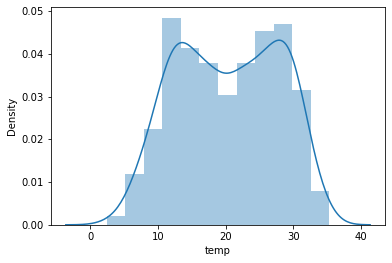

In [20]:
# Distplot for temp column
sns.distplot(bike_share['temp'])

From the above graph we can say that temp column has mostly values from 10 to 30 which clearly says that the column values are distibuted well.

<AxesSubplot:xlabel='atemp', ylabel='Density'>

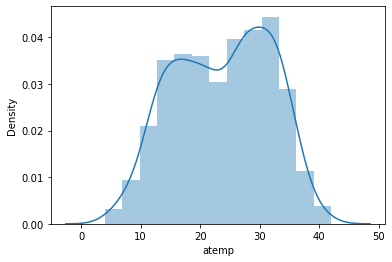

In [21]:
# Distplot for atemp column
sns.distplot(bike_share['atemp'])

From the above graph we can say that atemp column is almost similar from the temp column. 

<AxesSubplot:xlabel='hum', ylabel='Density'>

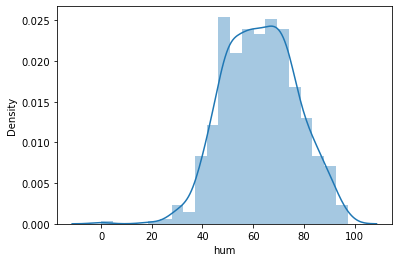

In [22]:
# Distplot for humidity
sns.distplot(bike_share['hum'])

From the above graph we can say that the values are normally distributed and lie between 40 to 80 mostly. Hence we can say that the values in the column are good

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

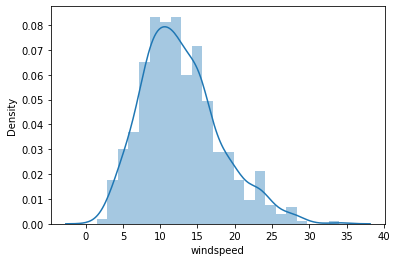

In [23]:
# Distplot for windspeed
sns.distplot(bike_share['windspeed'])

From the above graph we can say that the graph in normally distirbuted and values are between 5 to 20 which conveys that the data is fine.

<AxesSubplot:xlabel='cnt', ylabel='Density'>

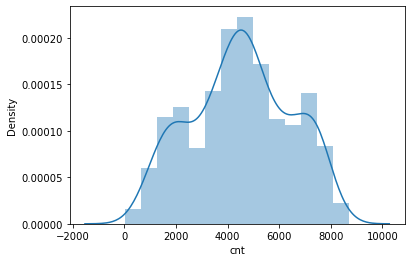

In [24]:
sns.distplot(bike_share['cnt'])

From the above graph we can say that values are distributed normally

### Plotting categorical variables for analysis

In [25]:
bike_share_categorical = bike_share.select_dtypes(exclude=['float64','int64'])
bike_share_categorical.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

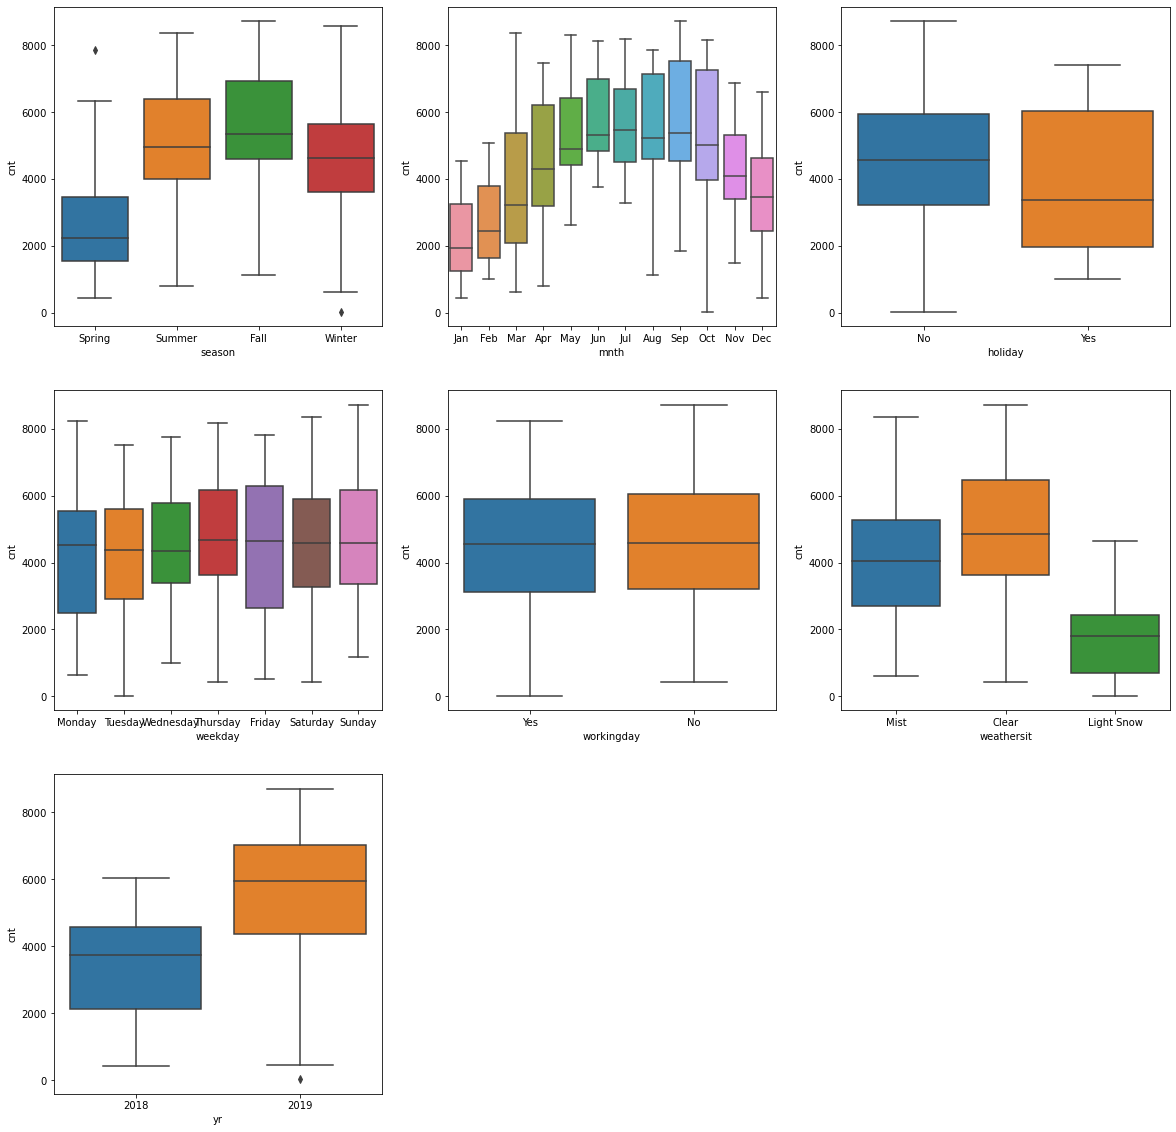

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_share)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=bike_share)
plt.subplot(3,3,3)
sns.boxplot(x='holiday',y='cnt',data=bike_share)
plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_share)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_share)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_share)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt',data=bike_share)
plt.show()

<br> 1) From the first graph we can see that the count in fall sem is more and in summer it is the least.
<br> 2) From the second graph we can say that in the month of sept it has the maximum count where as in jan it has the least.
<br> 3) From the third graph we can say that when there is a holiday people use more bike shares compared to normal days
<br> 4) From the fourth day we can say that the median on all the days lie approximately on the same line
<br> 5) From the fifth graph we can say that on a non workingday count is slightly more than the workingday count
<br> 6) From the sixth graph we can say that on a clear day the count is max and on a light snow day the count is least
<br> 7) From the seventh graph we can say that the count has increased in 2019 as compared to 2018


### Plotting Continuous variable for analysis

In [27]:
bike_share.describe().columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [28]:
bike_share[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt']].head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
Intvariablelist = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt']

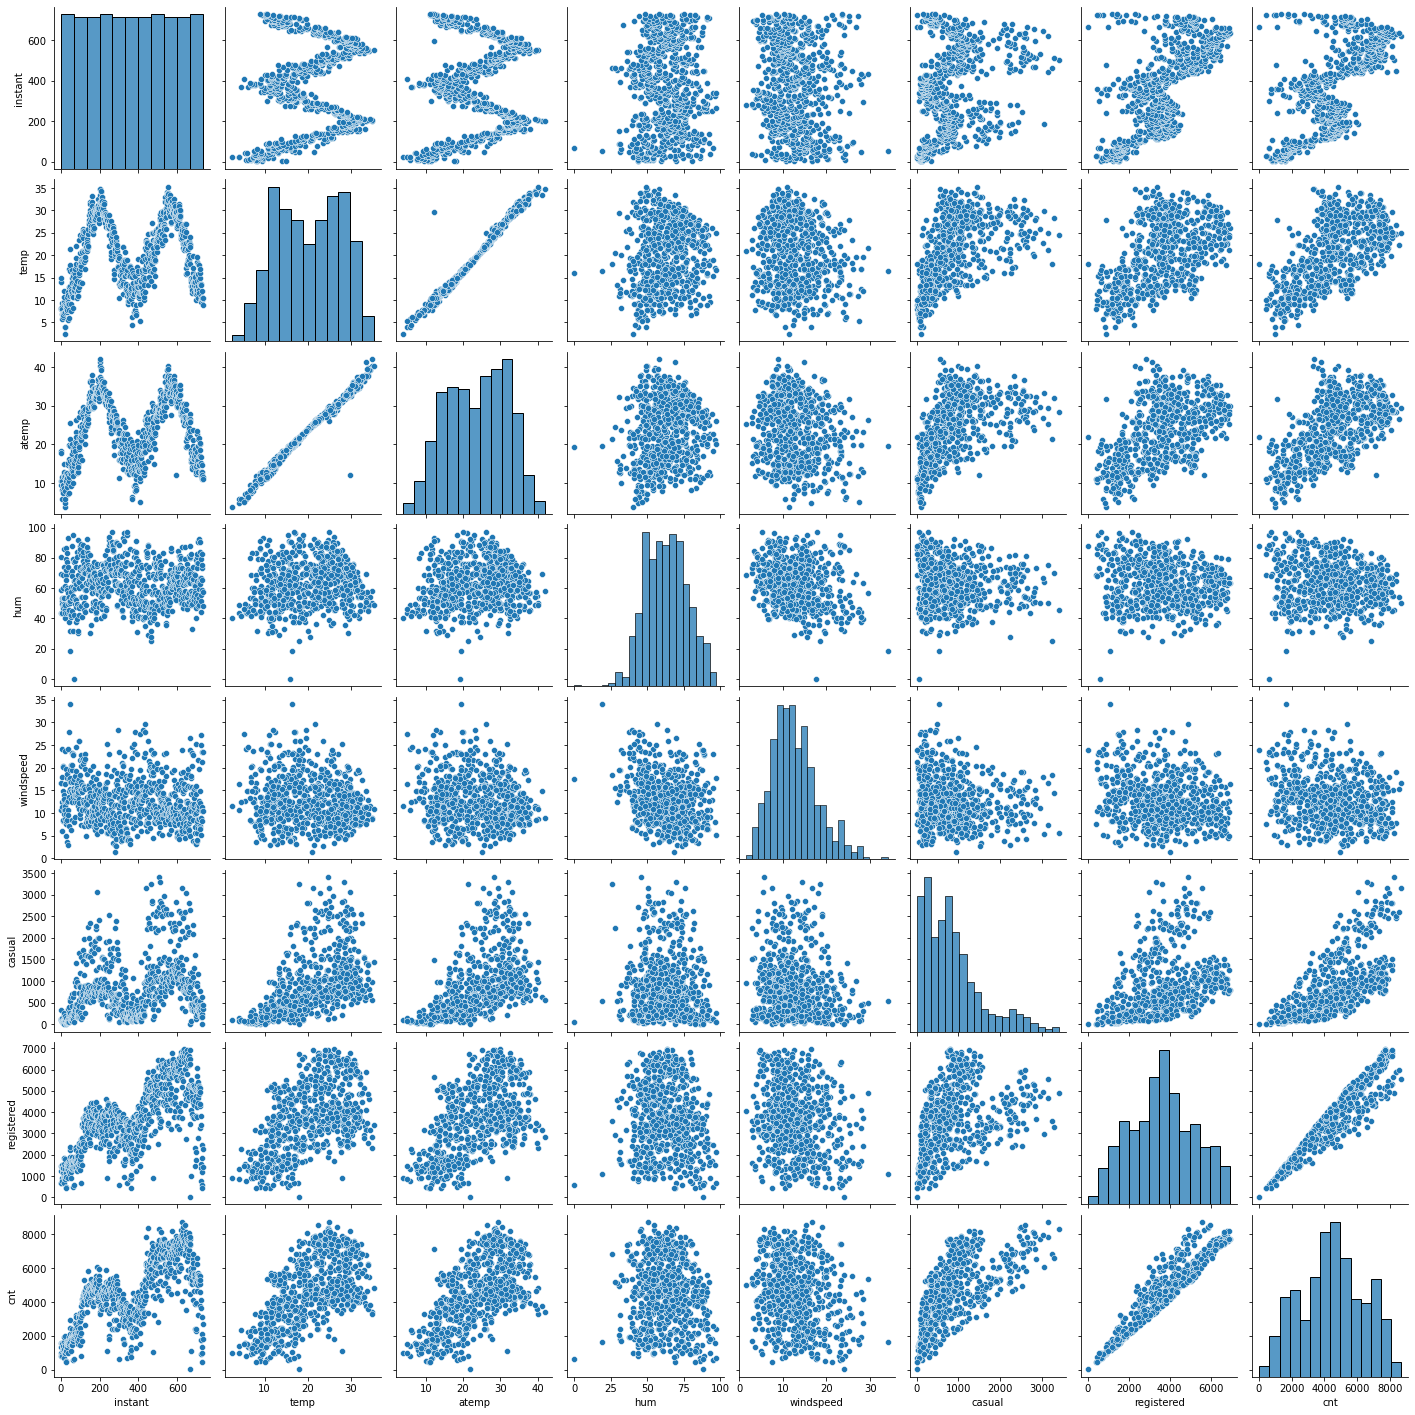

In [30]:
sns.pairplot(bike_share[Intvariablelist])
plt.show()

<br> 1) From the graph between temp and atemp we can see multicollinearity of variable hence we need drop one of the columns
<br> 2) From the graph between resgistered and count we can see multicollinearity of variable hence we need drop one of the columns
<br> 3) The graph between casual and cnt and registered and casual is similar 
<br> 4) From the rest of the graphs the points are scattered and can be used for model building

In [31]:
# storing the correlation between variables into a variable
corr = bike_share[Intvariablelist].corr()
corr

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
temp,0.150738,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.629896,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

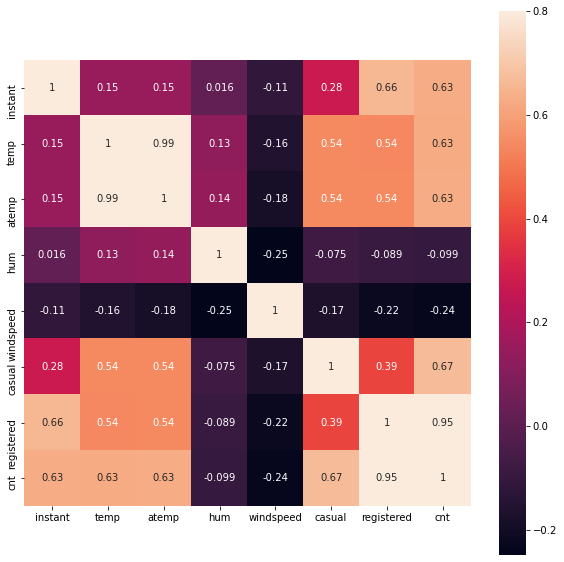

In [32]:
# Printing the heat map
plt.figure(figsize = (10,10))
sns.heatmap(corr,vmax=0.8,square= True,annot = True)

<br> 1) We can see that the correlation value between temp and atemp is 0.99 and one variable needs to be dropped
<br> 2) We can also see that correlation between casual, registered with cnt is high and we need to drop casual and registered

In [33]:
# dropping columns atemp, casual and registered. Also dropping dteday and instant as they are not required
bike_share.drop(['atemp','casual','registered','dteday','instant'],axis =1,inplace = True)

In [34]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Monday,Yes,Mist,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Friday,Yes,Clear,9.305237,43.6957,12.522300,1600


#### Preparing the data with dummy variables for categorical columns

In [35]:
bike_share_cat = bike_share.select_dtypes(exclude=['float64','int64'])
bike_share_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Spring,2018,Jan,No,Monday,Yes,Mist
1,Spring,2018,Jan,No,Tuesday,Yes,Mist
2,Spring,2018,Jan,No,Wednesday,Yes,Clear
3,Spring,2018,Jan,No,Thursday,Yes,Clear
4,Spring,2018,Jan,No,Friday,Yes,Clear
...,...,...,...,...,...,...,...
725,Spring,2019,Dec,No,Friday,Yes,Mist
726,Spring,2019,Dec,No,Saturday,No,Mist
727,Spring,2019,Dec,No,Sunday,No,Mist
728,Spring,2019,Dec,No,Monday,Yes,Clear


In [36]:
# creating dummy variables for categorical columns
bike_share_dummies = pd.get_dummies(bike_share_cat,drop_first = True)
bike_share_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# dropping the categoical columns
bike_share.drop(list(bike_share_cat),axis = 1,inplace = True)

In [38]:
# concating the dummy data set and the left original data set having continuous variable
bike_share = pd.concat([bike_share, bike_share_dummies],axis =1)

In [39]:
bike_share.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
bike_share.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

Now we have added the dummy variables to our main data and all the columns are categorical columns

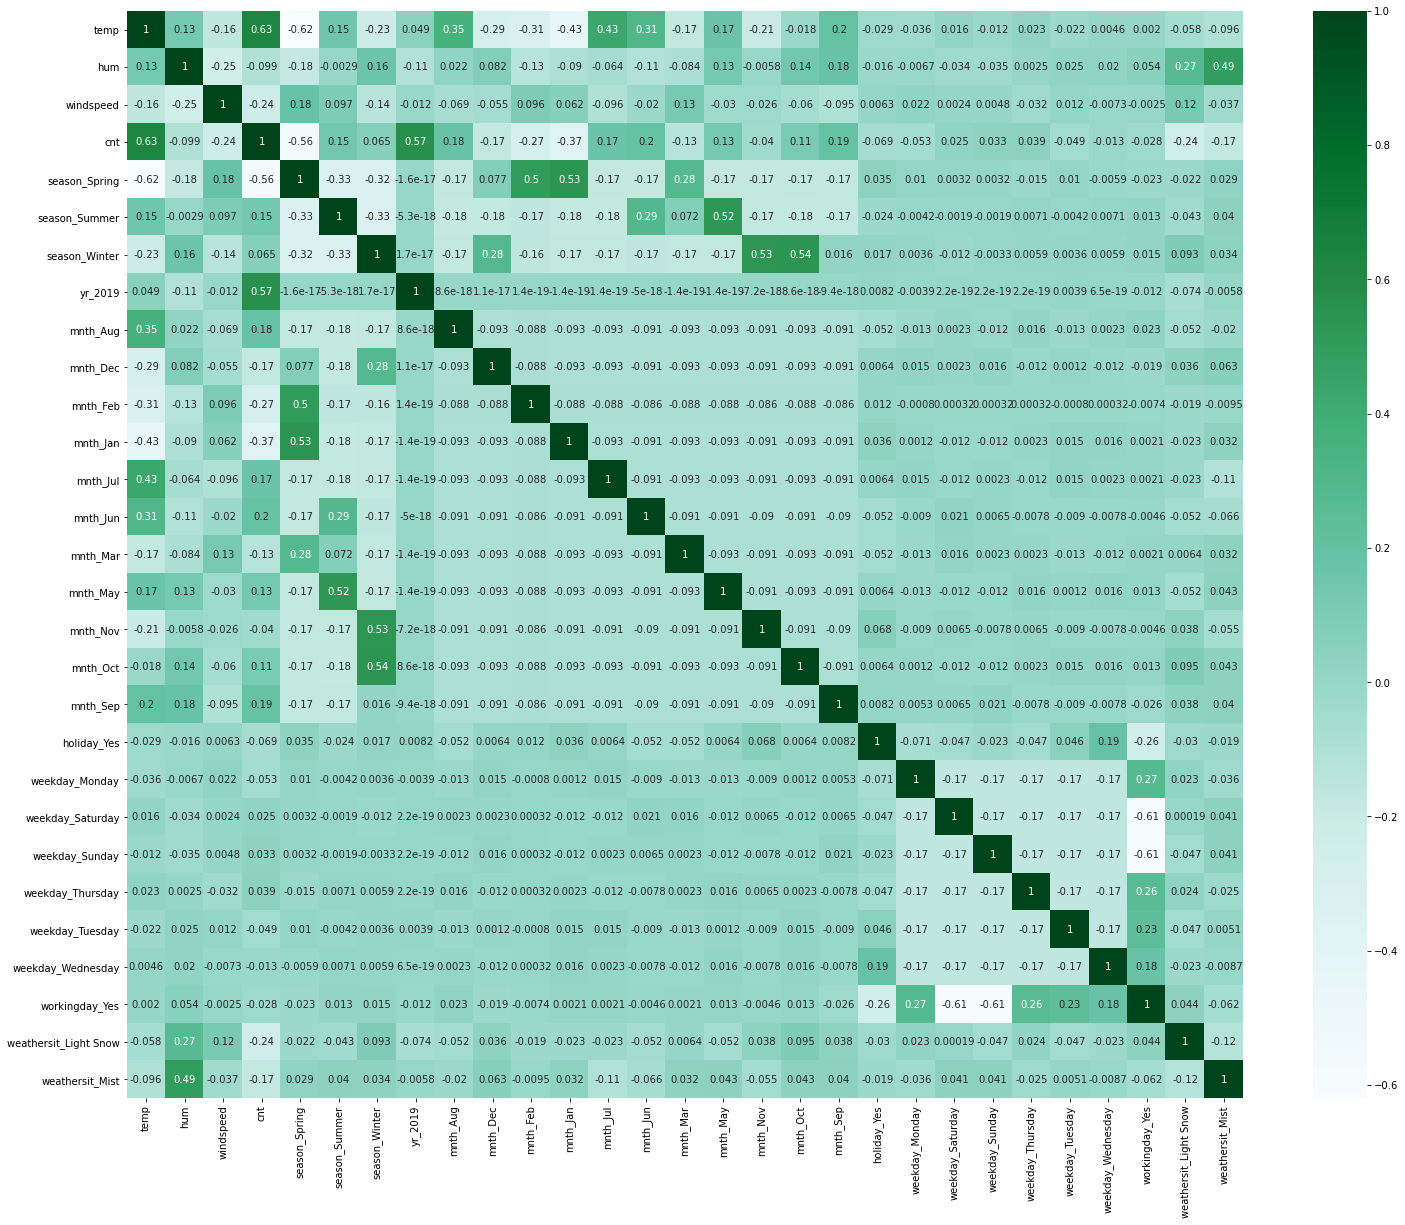

In [41]:
# Correlation matrix between the final variables
plt.figure(figsize = (25,20))
sns.heatmap(bike_share.corr(), annot = True, cmap="BuGn")
plt.show()

The heat map will tell us about the correlation between variables which can be referred at later stage when we need to drop variables according to VIF and p-value

## Train and Test Preparation

First we will divide the data into train and test set


In [42]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.70, test_size = 0.30, random_state = 333)

In [43]:
# viewing the data 
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
483,18.791653,58.7083,7.832836,6304,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
650,16.126653,49.4583,9.791514,7109,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
212,31.638347,55.0833,10.500039,4266,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
714,14.862500,83.8750,6.749714,3786,0,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,1
8,5.671653,43.4167,24.250650,822,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [44]:
df_train.shape

(510, 29)

In [45]:
df_test.shape

(219, 29)

## Scaling the data

In [46]:
#importing the library
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
#applying the scalar to nummerical columns
num = ['temp','hum','windspeed','cnt']
df_train[num] = scaler.fit_transform(df_train[num])

In [49]:
#viewing the data after scaling
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
483,0.497426,0.609956,0.194850,0.722734,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
650,0.416433,0.513852,0.255118,0.815347,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
212,0.887856,0.572294,0.276919,0.488265,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
714,0.378013,0.871429,0.161523,0.433042,0,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,1
8,0.098690,0.451083,0.700017,0.092039,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [50]:
# now we will divide the data into X and y
y_train = df_train.pop('cnt')
X_train = df_train

In [51]:
X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
483,0.497426,0.609956,0.194850,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
650,0.416433,0.513852,0.255118,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
212,0.887856,0.572294,0.276919,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
714,0.378013,0.871429,0.161523,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
8,0.098690,0.451083,0.700017,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## RFE 

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 11),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', False, 8),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 5),
 ('weekday_Wednesday', False, 10),
 ('workingday_Yes', False, 2),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_May', 'mnth_Oct', 'holiday_Yes', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday_Yes'],
      dtype='object')

In [57]:
# Creating dataset with RFE variables
X_train_rfe = X_train[col]

# Building Linear Model 

We will use the RFE varaible data set and build a model using stats model

In [58]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.05e-184
Time:                        22:27:03   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     494   BIC:                            -906.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

VIF CHECK

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,22.38
0,temp,15.98
2,windspeed,5.01
4,season_Winter,2.74
3,season_Spring,2.68
14,weathersit_Mist,2.27
5,yr_2019,2.05
9,mnth_Nov,1.83
7,mnth_Jul,1.42
6,mnth_Dec,1.41


##### Now we can see that VIF of hum , temp is greater than 5. So we will drop column hum and build the model again

In [60]:
X_train_1 = X_train_rfe.drop(['hum'],axis=1)
X_train_1.head()

,temp,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow,weathersit_Mist
483,0.497426,0.194850,0,0,1,0,0,0,0,0,0,0,0,0
650,0.416433,0.255118,0,1,1,0,0,0,0,0,0,1,0,0
212,0.887856,0.276919,0,0,0,0,0,0,0,0,0,0,0,0
714,0.378013,0.161523,0,1,1,1,0,0,0,0,0,0,0,1
8,0.098690,0.700017,1,0,0,0,0,0,0,0,0,0,0,0


In [61]:
#Building the model again
# Add a constant
X_train_lm2 = sm.add_constant(X_train_1)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.51e-181
Time:                        22:27:03   Log-Likelihood:                 494.44
No. Observations:                 510   AIC:                            -958.9
Df Residuals:                     495   BIC:                            -895.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

VIF CHECK

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.24
1,windspeed,4.98
3,season_Winter,2.36
4,yr_2019,2.04
2,season_Spring,1.90
8,mnth_Nov,1.80
13,weathersit_Mist,1.54
6,mnth_Jul,1.38
5,mnth_Dec,1.34
7,mnth_Mar,1.22


##### Now we can see that temp column has VIF more than 5 hence we will drop the temp column and build model again

In [63]:
X_train_2 = X_train_1.drop(['temp'],axis=1)
X_train_2.head()

,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow,weathersit_Mist
483,0.194850,0,0,1,0,0,0,0,0,0,0,0,0
650,0.255118,0,1,1,0,0,0,0,0,0,1,0,0
212,0.276919,0,0,0,0,0,0,0,0,0,0,0,0
714,0.161523,0,1,1,1,0,0,0,0,0,0,0,1
8,0.700017,1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#Building the model again
# Add a constant
X_train_lm3 = sm.add_constant(X_train_2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     129.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.65e-150
Time:                        22:27:03   Log-Likelihood:                 416.55
No. Observations:                 510   AIC:                            -805.1
Df Residuals:                     496   BIC:                            -745.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.56

VIF CHECK 

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.89
2,season_Winter,2.35
3,yr_2019,1.87
7,mnth_Nov,1.77
1,season_Spring,1.72
12,weathersit_Mist,1.47
4,mnth_Dec,1.34
6,mnth_Mar,1.22
10,weekday_Sunday,1.20
9,weekday_Saturday,1.19


##### Now we can see that the p-value of season_winter is insignificant hence we will drop the column

In [66]:
X_train_3 = X_train_2.drop(['season_Winter'],axis=1)
X_train_3.head()

,windspeed,season_Spring,yr_2019,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow,weathersit_Mist
483,0.194850,0,1,0,0,0,0,0,0,0,0,0
650,0.255118,0,1,0,0,0,0,0,0,1,0,0
212,0.276919,0,0,0,0,0,0,0,0,0,0,0
714,0.161523,0,1,1,0,0,0,0,0,0,0,1
8,0.700017,1,0,0,0,0,0,0,0,0,0,0


In [67]:
#Building the model again
# Add a constant
X_train_lm4 = sm.add_constant(X_train_3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.94e-151
Time:                        22:27:03   Log-Likelihood:                 416.49
No. Observations:                 510   AIC:                            -807.0
Df Residuals:                     497   BIC:                            -751.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.56

    VIF CHECK

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.84
2,yr_2019,1.84
1,season_Spring,1.61
11,weathersit_Mist,1.44
5,mnth_Mar,1.22
8,weekday_Saturday,1.19
9,weekday_Sunday,1.19
6,mnth_Nov,1.16
7,mnth_Sep,1.13
3,mnth_Dec,1.12


##### Now we can see that weekday_Sunday has high p-value hence we will drop it and build the model again

In [69]:
X_train_4 = X_train_3.drop(['weekday_Sunday'],axis=1)
X_train_4.head()

,windspeed,season_Spring,yr_2019,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow,weathersit_Mist
483,0.194850,0,1,0,0,0,0,0,0,0,0
650,0.255118,0,1,0,0,0,0,0,0,0,0
212,0.276919,0,0,0,0,0,0,0,0,0,0
714,0.161523,0,1,1,0,0,0,0,0,0,1
8,0.700017,1,0,0,0,0,0,0,0,0,0


In [70]:
#Building the model again
# Add a constant
X_train_lm5 = sm.add_constant(X_train_4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     152.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.48e-151
Time:                        22:27:03   Log-Likelihood:                 415.12
No. Observations:                 510   AIC:                            -806.2
Df Residuals:                     498   BIC:                            -755.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.56

VIF CHECK

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.77
2,yr_2019,1.83
1,season_Spring,1.61
10,weathersit_Mist,1.44
5,mnth_Mar,1.22
8,weekday_Saturday,1.17
6,mnth_Nov,1.15
7,mnth_Sep,1.12
3,mnth_Dec,1.11
4,mnth_Jul,1.10


##### As we can see that p-value of mnth_Jul is high we will drop the column and buidl model again

In [72]:
X_train_5 = X_train_4.drop(['mnth_Jul'],axis=1)
X_train_5.head()

,windspeed,season_Spring,yr_2019,mnth_Dec,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow,weathersit_Mist
483,0.194850,0,1,0,0,0,0,0,0,0
650,0.255118,0,1,0,0,0,0,0,0,0
212,0.276919,0,0,0,0,0,0,0,0,0
714,0.161523,0,1,1,0,0,0,0,0,1
8,0.700017,1,0,0,0,0,0,0,0,0


In [73]:
#Building the model again
# Add a constant
X_train_lm6 = sm.add_constant(X_train_5)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     166.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.37e-152
Time:                        22:27:03   Log-Likelihood:                 413.50
No. Observations:                 510   AIC:                            -805.0
Df Residuals:                     499   BIC:                            -758.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

VIF CHECK

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.67
2,yr_2019,1.81
1,season_Spring,1.58
9,weathersit_Mist,1.43
4,mnth_Mar,1.22
7,weekday_Saturday,1.17
5,mnth_Nov,1.14
3,mnth_Dec,1.11
6,mnth_Sep,1.11
8,weathersit_Light Snow,1.07


##### We can see that mnth_Mar and weekday_Saturday has high p-value but VIF of mnth_Mar is more than weekday_Saturday hence dropping mnth_Mar

In [75]:
X_train_6 = X_train_5.drop(['mnth_Mar'],axis=1)
X_train_6.head()

,windspeed,season_Spring,yr_2019,mnth_Dec,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow,weathersit_Mist
483,0.194850,0,1,0,0,0,0,0,0
650,0.255118,0,1,0,0,0,0,0,0
212,0.276919,0,0,0,0,0,0,0,0
714,0.161523,0,1,1,0,0,0,0,1
8,0.700017,1,0,0,0,0,0,0,0


In [76]:
#Building the model again
# Add a constant
X_train_lm7 = sm.add_constant(X_train_6)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.18e-152
Time:                        22:27:03   Log-Likelihood:                 411.72
No. Observations:                 510   AIC:                            -803.4
Df Residuals:                     500   BIC:                            -761.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.57

VIF CHECK

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.66
2,yr_2019,1.81
1,season_Spring,1.46
8,weathersit_Mist,1.43
6,weekday_Saturday,1.16
4,mnth_Nov,1.14
5,mnth_Sep,1.11
3,mnth_Dec,1.09
7,weathersit_Light Snow,1.06


Now we can see that the r-squared is 0.768 for the lr7 model. But as we can see that lr2 model had a R-squared score of 0.832 and all the variables had p-value 0.05 and VFI less than 5 except temp. From the correlation graph we saw that temp has 0.63 correlation with cnt which maximum among all the variables. Hence dropping temp will affect the model. Hence we will take lr2 as the final model

## Residual Analysis

#### After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

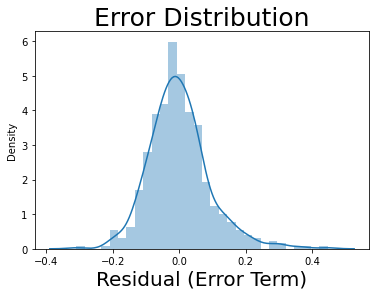

In [78]:
y_train_pred = lr2.predict(X_train_lm2)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly

###### Assumption of Error Terms Being Independent

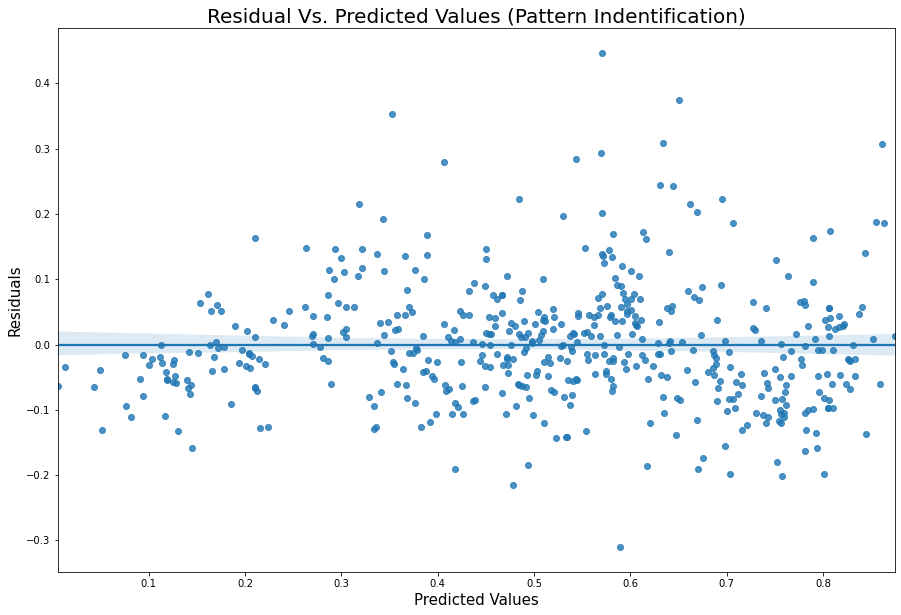

In [79]:
plt.figure(figsize = (15,10))
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [80]:
import datetime
from scipy.stats import pearsonr
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 3.5839387013680835e-15


#### From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern

### Homoscedasticity

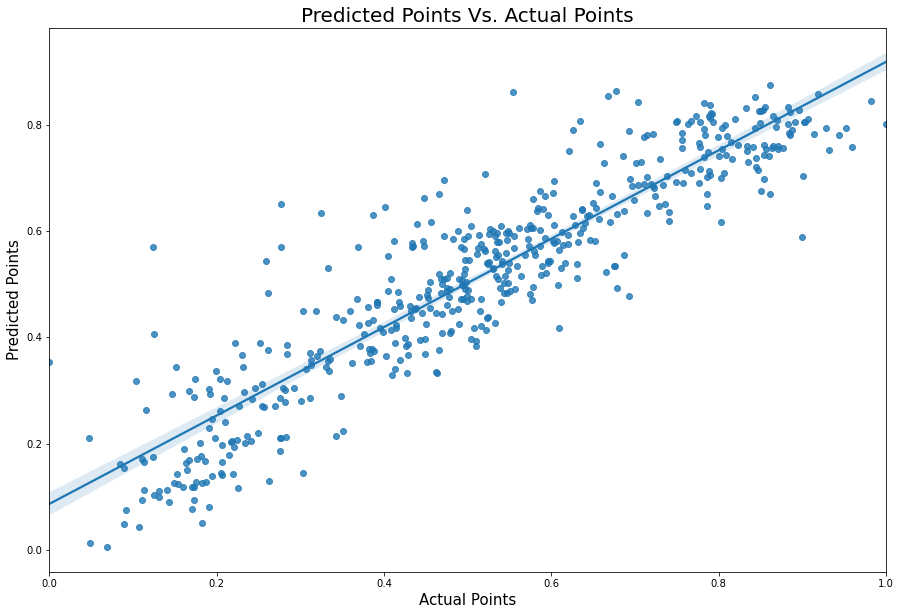

In [81]:
plt.figure(figsize = (15,10))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

##### From the above graph, we can say that residuals are equal distributed across predicted value.This means we see equal variance and we do NOT observe high concentration of data points in certain region & low concentration  in certain regions. This proves Homoscedasticity of Error Terms

### RUNNING THE MODEL ON TEST DATA SET

##### USING LR7 MODEL

In [82]:
# Scaling the test data
num = ['temp','hum','windspeed','cnt']
df_test[num] = scaler.fit_transform(df_test[num])

In [83]:
df_test.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
22,0.000000,0.214684,0.517945,0.060844,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
468,0.529437,0.311966,0.365150,0.881481,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
553,0.964569,0.415751,0.185998,0.528077,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
504,0.696625,0.352259,0.539258,0.839523,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
353,0.384393,0.447497,0.010221,0.411205,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
# Removing all the uncessary columns
X_test = X_test[['windspeed', 'season_Spring', 'yr_2019', 'mnth_Dec', 'mnth_Nov',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow',
       'weathersit_Mist']]

In [86]:
X_test.head()

,windspeed,season_Spring,yr_2019,mnth_Dec,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow,weathersit_Mist
22,0.517945,1,0,0,0,0,0,0,0
468,0.365150,0,1,0,0,0,0,0,0
553,0.185998,0,1,0,0,0,0,0,0
504,0.539258,0,1,0,0,0,0,0,0
353,0.010221,0,0,1,0,0,0,0,1


In [87]:
X_test_m7 = sm.add_constant(X_test)

In [88]:
# Making prediction using Model lr7
y_test_pred = lr7.predict(X_test_m7)

In [89]:
# Calculating r2_score for model lr7
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7705581780407331

Now we can see that the r2_score is 0.77 for the lr7 model. But as we can see that lr2 model had a R-squared score of 0.832 and all the variables had p-value 0.05 and VFI less than 5 except temp. From the correlation graph we saw that temp has 0.63 correlation with cnt which maximum among all the variables. Hence dropping temp will affect the model. Hence lets calculate the r2_score for lr2 model

##### USING LR2 MODEL 

In [90]:
y_test.head()

22     0.060844
468    0.881481
553    0.528077
504    0.839523
353    0.411205
Name: cnt, dtype: float64

In [91]:
df_test.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light Snow,weathersit_Mist
22,0.000000,0.214684,0.517945,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
468,0.529437,0.311966,0.365150,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
553,0.964569,0.415751,0.185998,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
504,0.696625,0.352259,0.539258,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
353,0.384393,0.447497,0.010221,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


As we have done the scaling earlier. Hence we can just remove the columns which are not in X_train_1 and make prediction on y_test

In [92]:
X_train_1.columns

Index(['temp', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [93]:
# taking the required columns used in lr2 model
X_test_2 = df_test[['temp', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow',
       'weathersit_Mist']]

In [94]:
# viewing the test data set 
X_test_2.head()

,temp,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow,weathersit_Mist
22,0.000000,0.517945,1,0,0,0,0,0,0,0,0,0,0,0
468,0.529437,0.365150,0,0,1,0,0,0,0,0,0,1,0,0
553,0.964569,0.185998,0,0,1,0,1,0,0,0,0,0,0,0
504,0.696625,0.539258,0,0,1,0,0,0,0,0,0,0,0,0
353,0.384393,0.010221,0,1,0,1,0,0,0,0,0,0,0,1


In [95]:
# adding constant
X_test_m2 = sm.add_constant(X_test_2)

In [96]:
# Making prediction using Model lr2
y_test_pred_2 = lr2.predict(X_test_m2)

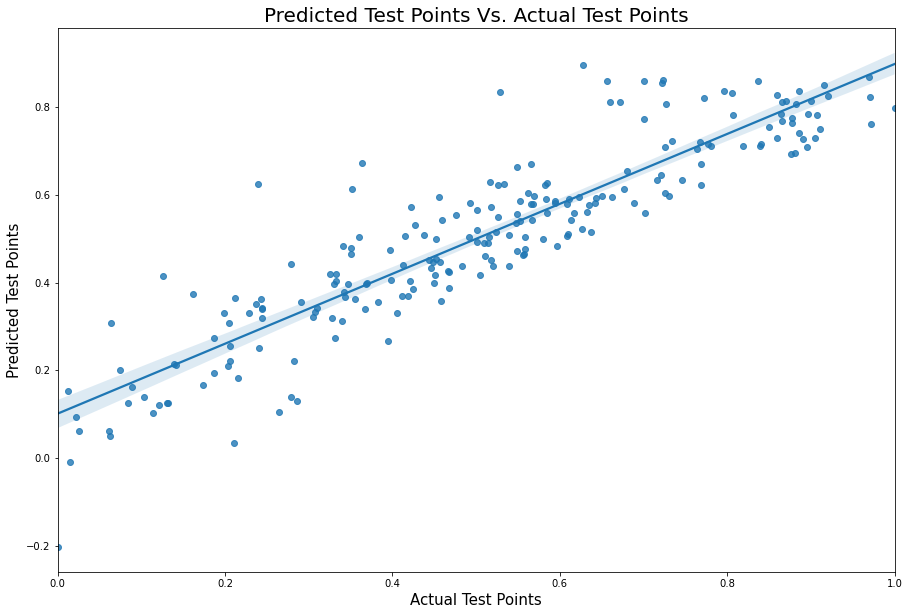

In [97]:
plt.figure(figsize = (15,10))
corr_plot = sns.regplot(x=y_test, y=y_test_pred_2)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

##### Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

In [98]:
# Checking the r2_score for Model lr2
r2_score(y_test, y_test_pred_2)

0.8183877766118356

## CONCLUSION

In [99]:
# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lr2.params,3))


Coefficent for the variables are:
const                    0.267
temp                     0.424
windspeed               -0.153
season_Spring           -0.126
season_Winter            0.071
yr_2019                  0.233
mnth_Dec                -0.052
mnth_Jul                -0.045
mnth_Mar                 0.051
mnth_Nov                -0.059
mnth_Sep                 0.055
weekday_Saturday         0.027
weekday_Sunday           0.028
weathersit_Light Snow   -0.313
weathersit_Mist         -0.077
dtype: float64


### The equation of the best fitted line is:

cnt = 0.267 + (0.424 x temp) - (0.153 x windspeed) - (0.126 x season_spring) + (0.071 x season_winter) + (0.233 x yr_2019) - (0.052 x mnth_Dec) - (0.045 x mnth_Jul) + (0.051 x mnth_Mar) - (0.059 x mnth_Nov) + (0.055 x mnth_Sep) + (0.027 x weekday_Saturday) + (0.028 x weekday_Sunday) - (0.313 x weathersit_Light Snow) - (0.077 x weathersit_Mist) 